In [9]:
# Import our dependencies
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


df = pd.read_csv("price2.csv")



In [10]:
#  Import and read the data.csv.


df
beef_price_jan2022= df['Price_beef_kilo'].iloc[-1]
rice_price_jan2022= df['Price_rice_kilo'].iloc[-1]
coffee_price_jan2022= df['Price_coffee_kilo'].iloc[-1]
df=df.drop(df.index[-1])
df


,Year,Month,Price_beef_kilo,Price_rice_kilo,Price_coffee_kilo,Inflation_rate,Price_rice_infl,Price_beef_infl,Price_coffee_infl
0,1992,Feb,2.52,0.28,1.51,89.59,0.53,4.78,2.86
1,1992,Mar,2.45,0.28,1.55,89.59,0.53,4.64,2.94
2,1992,Apr,2.38,0.28,1.45,89.59,0.53,4.51,2.75
3,1992,May,2.38,0.27,1.34,89.59,0.51,4.51,2.54
4,1992,Jun,2.33,0.27,1.30,89.59,0.51,4.42,2.46
...,...,...,...,...,...,...,...,...,...
354,2021,Aug,5.61,0.40,4.77,-1.29,0.39,5.54,4.71
355,2021,Sep,5.66,0.40,4.97,-1.29,0.39,5.59,4.91
356,2021,Oct,5.70,0.40,5.31,-1.29,0.39,5.63,5.24
357,2021,Nov,5.95,0.40,5.71,-1.29,0.39,5.87,5.64


# Inflation Rate

In [11]:
# Create data to predict the inflation rate
columns = ['Year', 'Month', 'Price_beef_kilo', 'Price_rice_kilo', 'Price_coffee_kilo', 'Inflation_rate']
df_inflation = df[columns]


month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create the target
y = df_inflation['Inflation_rate']

# Create features
X = df_inflation.drop('Inflation_rate', axis=1)

# Map month names to numbers in the features DataFrame
X['Month'] = X['Month'].map({month: i + 1 for i, month in enumerate(month_order)})
# Split the data into training and temp sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the temp set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [12]:
# Define the model
model1 = Sequential()
model1.add(Dense(100, input_shape=(5,), activation='relu'))
model1.add(Dense(50, activation='relu'))
model1.add(Dense(1, activation='linear'))
# Compile the model
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
# Train the model
history = model1.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val))



Epoch 1/50


16/16 [==============================] - 1s 10ms/step - loss: 2354.3491 - mae: 38.2062 - val_loss: 1076.4185 - val_mae: 28.8893
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 971.1642 - mae: 24.8453 - val_loss: 959.0579 - val_mae: 27.4996
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 809.4871 - mae: 23.8722 - val_loss: 868.4780 - val_mae: 26.5091
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 785.2722 - mae: 23.7117 - val_loss: 717.1153 - val_mae: 23.3236
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 794.3843 - mae: 23.1802 - val_loss: 736.1761 - val_mae: 22.9312
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 726.9069 - mae: 23.5316 - val_loss: 739.1890 - val_mae: 22.8623
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 709.0613 - mae: 22.9312 - val_loss: 709.1302 - val_mae: 23.9804
Epoch 8/50
16/16 [=======================

In [13]:
# Evaluate the model
loss, mae = model1.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test MAE: {mae}')

2/2 [==============================] - 0s 4ms/step - loss: 730.6008 - mae: 22.8128
Test Loss: 730.600830078125, Test MAE: 22.812807083129883


In [14]:
# Pridict Inflation Rate for january 2022
# Create a DataFrame with the input data for January 2022
inflation_2022_df = pd.DataFrame([{'Year': 2022, 'Month': 1, 'Price_beef_kilo':beef_price_jan2022,'Price_rice_kilo':rice_price_jan2022 ,'Price_coffee_kilo':coffee_price_jan2022}])

# Use the trained model to predict the inflation
predicted_inflation_2022 = model1.predict(inflation_2022_df)

# Print the predicted inflation rate
print(f"Predicted inflation rate for January 2022: {predicted_inflation_2022[0][0]}")
last_inflation = df['Inflation_rate'].iloc[-1]
print(f"prediction jan 2022: {last_inflation}")

1/1 [==============================] - 0s 67ms/step
Predicted inflation rate for January 2022: 25.904335021972656
prediction jan 2022: -1.29


2/2 [==============================] - 0s 1ms/step


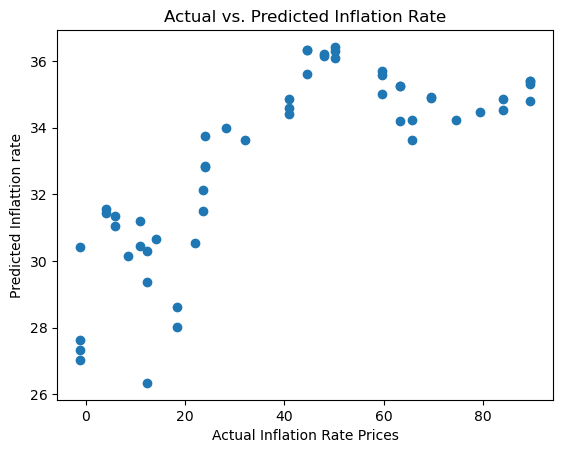

In [15]:
# Use the trained model to predict the inflation rate
predicted_inflation = model1.predict(X_test)

# Plotting actual vs. predicted
plt.scatter(y_test, predicted_inflation)
plt.xlabel('Actual Inflation Rate Prices')
plt.ylabel('Predicted Inflattion rate')
plt.title('Actual vs. Predicted Inflation Rate')
plt.show()

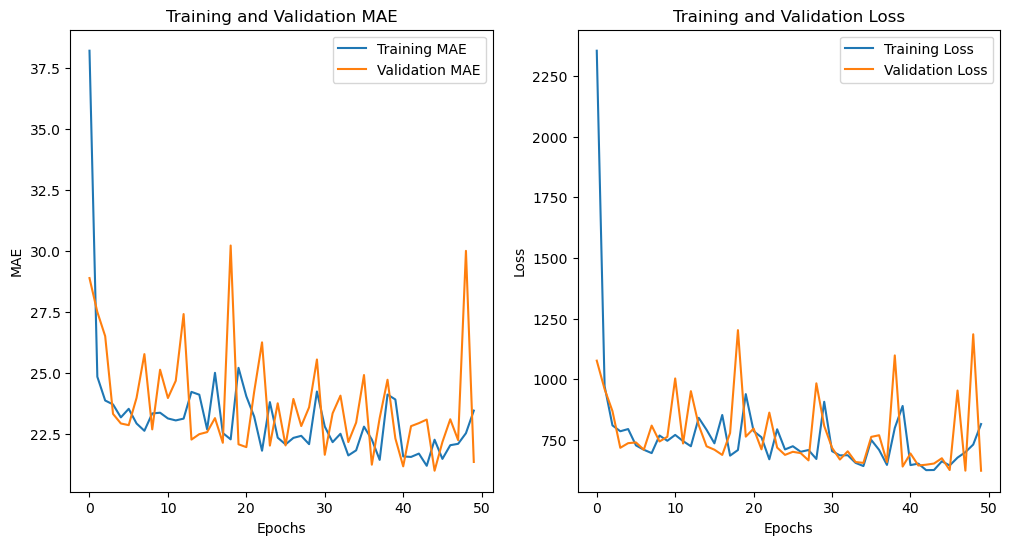

In [16]:
# Plot training and validation metrics
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

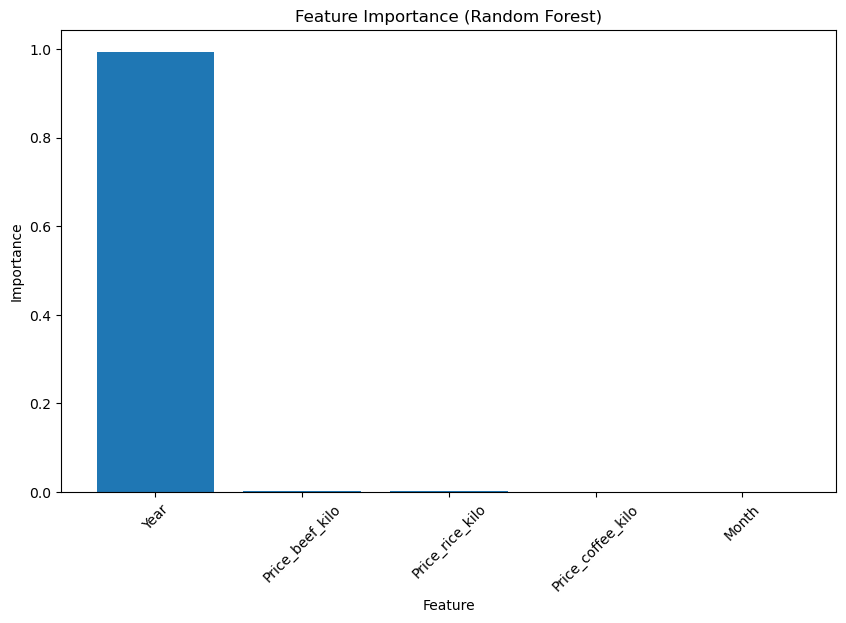

In [17]:
# Create the data to make a test with RandomForest Regression Model
columns = ['Year', 'Month', 'Price_beef_kilo', 'Price_rice_kilo', 'Price_coffee_kilo', 'Inflation_rate']
df = df.drop(df.index[-1])
df_inflation = df[columns]

# Encoding the months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create the target
y = df_inflation['Inflation_rate']

# Create features
X = df_inflation.drop('Inflation_rate', axis=1)

# Encode month names to numbers in the features DataFrame
X['Month'] = X['Month'].map({month: i + 1 for i, month in enumerate(month_order)})

# Use RandomForest Regression to see the importance of features

from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor model
rfr_model = RandomForestRegressor()

# Fit the model
rfr_model.fit(X, y)

# Get feature importances
importances = rfr_model.feature_importances_

# Get the names of the features
feature_names = X.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.show()

***As we can see, the only important feature is Year***

---

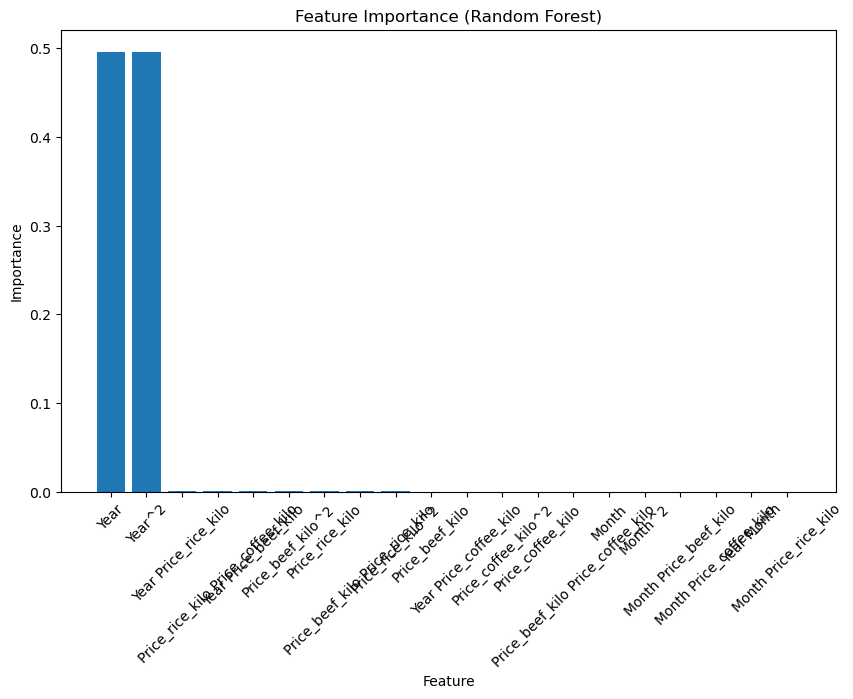

In [18]:
# Transform the input features into polynomial features to address imbalances in feature scales 
# Chose columns to predict the inflation rate
columns = ['Year', 'Month', 'Price_beef_kilo', 'Price_rice_kilo', 'Price_coffee_kilo', 'Inflation_rate']
df_inflation = df[columns].copy()

# Encode month names to numbers
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_inflation['Month'] = df_inflation['Month'].map({month: i + 1 for i, month in enumerate(month_order)})

# Create the target
y = df_inflation['Inflation_rate']

# Create features
X = df_inflation.drop('Inflation_rate', axis=1)


# Generates a new feature matrix with Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Split the data into training and temp
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Split the temp set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create a RandomForestRegressor model
rf_model = RandomForestRegressor()

# Fit the model
rf_model.fit(X_scaled, y)

# Get feature importances
importances = rf_model.feature_importances_

# Get the names of the features
feature_names = poly.get_feature_names_out(X.columns)

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_poly.shape[1]), importances[indices], align="center")
plt.xticks(range(X_poly.shape[1]), feature_names[indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.show()

In [19]:
columns = ['Year', 'Month', 'Price_beef_kilo', 'Price_rice_kilo', 'Price_coffee_kilo', 'Inflation_rate']
df_inflation = df[columns].copy()

# Encode month names to numbers
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_inflation['Month'] = df_inflation['Month'].map({month: i + 1 for i, month in enumerate(month_order)})

# Create the target
y = df_inflation['Inflation_rate']

# Create features
X = df_inflation.drop('Inflation_rate', axis=1)
# Use Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Use Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Split the data into training and temp
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Split the temp set into validation and test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the model
model = Sequential()
model.add(Dense(100, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(50, activation='relu'))

model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=16, validation_data=(X_val, y_val))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               2100      
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 7201 (28.13 KB)
Trainable params: 7201 (28.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/150
16/16 [==============================] - 1s 12ms/step - loss: 1907.7432 - mae: 34.9120 - val_loss: 1834.7440 - val_mae: 33.2916
Epoch 2/150
16/16 [==============================] - 0s 3ms/step - loss: 1779.2075 - mae: 33.2429 - val_loss: 1682.1704 - val_mae: 31.4983
Epoch

In [20]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test MAE: {mae}')

2/2 [==============================] - 0s 3ms/step - loss: 0.9393 - mae: 0.7461
Test Loss: 0.9392654299736023, Test MAE: 0.7460790276527405


In [21]:
# Predict the inflation for January 2022
# Create the new data
inflation_2022_df = pd.DataFrame([{'Year': 2022, 'Month': 1, 'Price_beef_kilo':beef_price_jan2022,'Price_rice_kilo':rice_price_jan2022 ,'Price_coffee_kilo':coffee_price_jan2022}])
X_poly_2022 = poly.transform(inflation_2022_df)
X_scaled_2022 = scaler.transform(X_poly_2022)

# Use the trained model to predict the inflation
predicted_inflation_2022 = model.predict(X_scaled_2022)

# Print the predicted inflation rate
print(f"Predicted inflation rate for January 2022: {predicted_inflation_2022[0][0]}")

1/1 [==============================] - 0s 39ms/step
Predicted inflation rate for January 2022: -2.7902448177337646


2/2 [==============================] - 0s 2ms/step


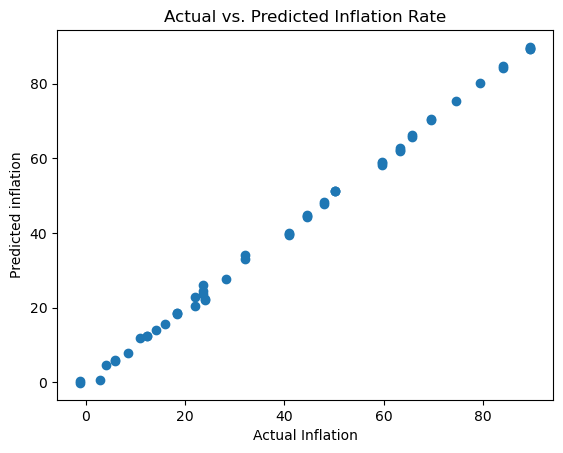

In [22]:
# Use the trained model to predict the Rate
predicted_inflation = model.predict(X_test)
# Plotting actual vs. predicted
plt.scatter(y_test, predicted_inflation)
plt.xlabel('Actual Inflation')
plt.ylabel('Predicted inflation')
plt.title('Actual vs. Predicted Inflation Rate')
plt.show()

The fact that the data points form a line from 0 to 80 in the actual vs. predicted inflation plot is a positive sign. It suggests that the predicted values closely follow the actual values, indicating good predictive performance.

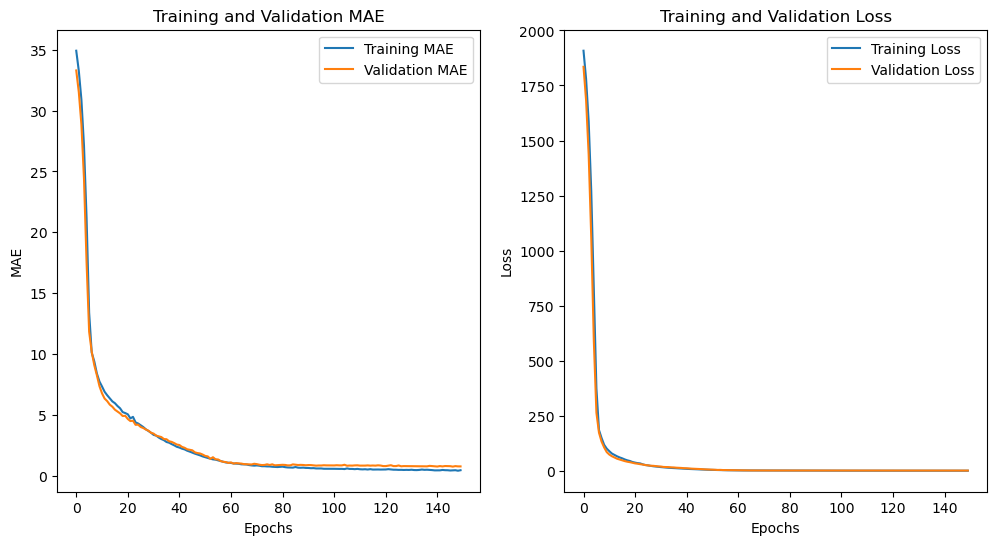

In [23]:
# Plot training and validation metrics
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

The L shape in both training and validation MAE/Loss curves suggests that the model is not overfitting.

---

### Inflation commodity

In [24]:
# Get the prices of January 2022 provided
old_price_rice = rice_price_jan2022
old_price_beef = beef_price_jan2022
old_price_coffee = coffee_price_jan2022

# Calculate the expected changes in prices based on the predicted inflation rate
predicted_inflation_rate = predicted_inflation_2022[0][0]

price_rice_infl = old_price_rice * (1 + predicted_inflation_rate)
price_beef_infl = old_price_beef * (1 + predicted_inflation_rate)
price_coffee_infl = old_price_coffee * (1 + predicted_inflation_rate)

# Print the predicted prices
print(f"Predicted Price_rice_kilo: {price_rice_infl}")
print(f"Predicted Price_beef_kilo: {price_beef_infl}")
print(f"Predicted Price_coffee_kilo: {price_coffee_infl}")


Predicted Price_rice_kilo: -0.7698052716255188
Predicted Price_beef_kilo: -10.687761561870575
Predicted Price_coffee_kilo: -10.705664010047913


In [25]:
# Create a dictionary to put all the information of January 2022
jan_2022 = {'Year': 2022, 'Month': "Jan", 'Price_beef_kilo': beef_price_jan2022,
                'Price_rice_kilo': rice_price_jan2022,
                'Price_coffee_kilo': coffee_price_jan2022,
                'Inflation_rate': predicted_inflation_rate,
                'Price_rice_infl': round(price_rice_infl ,2),
                'Price_beef_infl': round(price_beef_infl,2),
                'Price_coffee_infl': round(price_coffee_infl,2)
                }
jan_2022

{'Year': 2022,
 'Month': 'Jan',
 'Price_beef_kilo': 5.97,
 'Price_rice_kilo': 0.43,
 'Price_coffee_kilo': 5.98,
 'Inflation_rate': -2.7902448,
 'Price_rice_infl': -0.77,
 'Price_beef_infl': -10.69,
 'Price_coffee_infl': -10.71}

In [26]:
# Create a Dataframe with the new row
dfj = df.append(jan_2022, ignore_index=True)
dfj.tail()

C:\Users\romej\AppData\Local\Temp\ipykernel_22120\331352795.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfj = df.append(jan_2022, ignore_index=True)


,Year,Month,Price_beef_kilo,Price_rice_kilo,Price_coffee_kilo,Inflation_rate,Price_rice_infl,Price_beef_infl,Price_coffee_infl
354,2021,Aug,5.61,0.40,4.77,-1.290000,0.39,5.54,4.71
355,2021,Sep,5.66,0.40,4.97,-1.290000,0.39,5.59,4.91
356,2021,Oct,5.70,0.40,5.31,-1.290000,0.39,5.63,5.24
357,2021,Nov,5.95,0.40,5.71,-1.290000,0.39,5.87,5.64
358,2022,Jan,5.97,0.43,5.98,-2.790245,-0.77,-10.69,-10.71


### Predict commidity price

#### Predict Beef Price

In [27]:
# Create the dataframe to predict the beef price
columns = ['Year', 'Month', 'Price_beef_kilo']
df_b= df[columns]
df_b


,Year,Month,Price_beef_kilo
0,1992,Feb,2.52
1,1992,Mar,2.45
2,1992,Apr,2.38
3,1992,May,2.38
4,1992,Jun,2.33
...,...,...,...
353,2021,Jul,5.59
354,2021,Aug,5.61
355,2021,Sep,5.66
356,2021,Oct,5.70


In [28]:
# Create target and features X and y
y = df_b['Price_beef_kilo']

# Drop the target variable
X = df_b.drop('Price_beef_kilo', axis=1)


month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
X['Month'] = X['Month'].map({month: i + 1 for i, month in enumerate(month_order)})
X.head(13)

,Year,Month
0,1992,2
1,1992,3
2,1992,4
3,1992,5
4,1992,6
5,1992,7
6,1992,8
7,1992,9
8,1992,10
9,1992,11


In [29]:

# Create the train, validation, and test data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
# Define the model
modelb = Sequential()
modelb.add(Dense(300, input_shape=(2,), activation='relu'))
modelb.add(Dense(200, activation='relu'))
modelb.add(Dense(100, activation='relu'))
modelb.add(Dense(1, activation='linear'))

# Compile the model
modelb.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Display the model summary
modelb.summary()

# Train the model
history = modelb.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_val, y_val))



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 300)               900       
                                                                 
 dense_7 (Dense)             (None, 200)               60200     
                                                                 
 dense_8 (Dense)             (None, 100)               20100     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 81301 (317.58 KB)
Trainable params: 81301 (317.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
16/16 [==============================] - 1s 9ms/step - loss: 4764.2988 - mae: 57.8086 - val_loss: 1166.8693 - val_mae: 34.1340
Epoch 2/1

In [30]:
# Evaluate the model on the test set
loss, mae = modelb.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test MAE: {mae}')

2/2 [==============================] - 0s 4ms/step - loss: 2.7125 - mae: 1.4214
Test Loss: 2.7125070095062256, Test MAE: 1.4213505983352661


In [31]:
# Pridict the beef price for February 2022
# Create a DataFrame with the input data for January 2022
beef_2022_df = pd.DataFrame([{'Year': 2022, 'Month': 2}])

# Use the trained model to predict the beef price for January 2022
predicted_beef_price_2022 = modelb.predict(beef_2022_df)

# Print the predicted beef price
print(f"Predicted Beef Price for January 2022: {predicted_beef_price_2022[0][0]}")


1/1 [==============================] - 0s 41ms/step
Predicted Beef Price for January 2022: 4.137054443359375


2/2 [==============================] - 0s 3ms/step


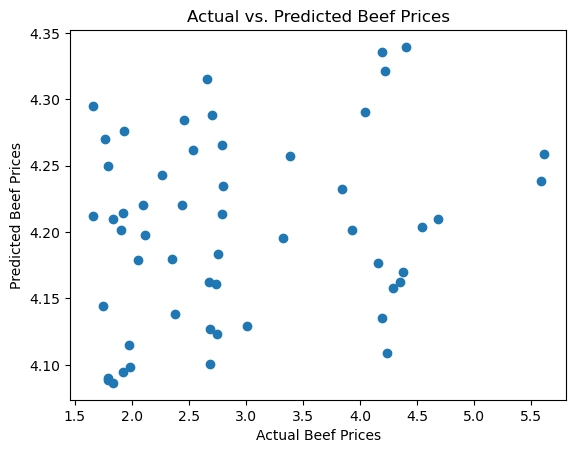

In [32]:
# Use the trained model to predict the beef prices for the test set
predicted_beef_prices = modelb.predict(X_test)

# Plotting actual vs. predicted
plt.scatter(y_test, predicted_beef_prices)
plt.xlabel('Actual Beef Prices')
plt.ylabel('Predicted Beef Prices')
plt.title('Actual vs. Predicted Beef Prices')
plt.show()

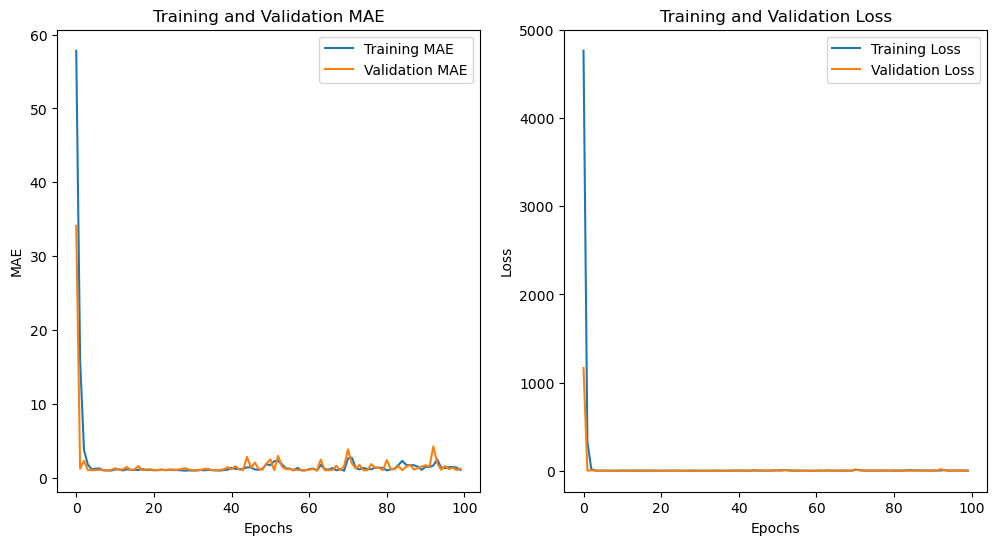

In [33]:
# Plot training and validation metrics
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### Predict Rice Price


In [34]:
# Create the dataframe to predict the rice price
columns = ['Year', 'Month', 'Price_rice_kilo']
df_r= df[columns]
df_r

,Year,Month,Price_rice_kilo
0,1992,Feb,0.28
1,1992,Mar,0.28
2,1992,Apr,0.28
3,1992,May,0.27
4,1992,Jun,0.27
...,...,...,...
353,2021,Jul,0.41
354,2021,Aug,0.40
355,2021,Sep,0.40
356,2021,Oct,0.40


In [35]:
#  Create the target
y = df_r['Price_rice_kilo']
# Create features
X = df_r.drop('Price_rice_kilo', axis=1)
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
X['Month'] = X['Month'].map({month: i + 1 for i, month in enumerate(month_order)})
X

,Year,Month
0,1992,2
1,1992,3
2,1992,4
3,1992,5
4,1992,6
...,...,...
353,2021,7
354,2021,8
355,2021,9
356,2021,10


In [36]:


# Create the train, validation, and test data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the model
modelr = Sequential()
modelr.add(Dense(200, input_shape=(2,), activation='relu'))
modelr.add(Dense(100, activation='relu'))
modelr.add(Dense(1, activation='linear'))

# Compile the model
modelr.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Display the model summary
modelr.summary()

# Train the model
history = modelr.fit(X_train, y_train, epochs=150, batch_size=16, validation_data=(X_val, y_val))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 200)               600       
                                                                 
 dense_11 (Dense)            (None, 100)               20100     
                                                                 
 dense_12 (Dense)            (None, 1)                 101       
                                                                 
Total params: 20801 (81.25 KB)
Trainable params: 20801 (81.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/150
16/16 [==============================] - 0s 8ms/step - loss: 1848.1207 - mae: 35.6166 - val_loss: 650.6311 - val_mae: 25.5053
Epoch 2/150
16/16 [==============================] - 0s 3ms/step - loss: 227.0591 - mae: 13.1092 - val_loss: 93.6628 - val_mae: 9.6719
Epoch 3/1

In [37]:
# Evaluate the model
loss, mae = modelr.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test MAE: {mae}')

2/2 [==============================] - 0s 3ms/step - loss: 0.0520 - mae: 0.1990
Test Loss: 0.05195426568388939, Test MAE: 0.1990244835615158


In [38]:
# Create a DataFrame with the input data for February 2022
input_data_2022_df = pd.DataFrame([{'Year': 2022, 'Month': 2}])

# Use the trained model to predict the rice price for January 2022
predicted_rice_price_2022 = modelr.predict(input_data_2022_df)

# Print the predicted beef price
print(f"Predicted Rice Price for January 2022: {predicted_rice_price_2022[0][0]}")


1/1 [==============================] - 0s 55ms/step
Predicted Rice Price for January 2022: 0.5494429469108582


2/2 [==============================] - 0s 1ms/step


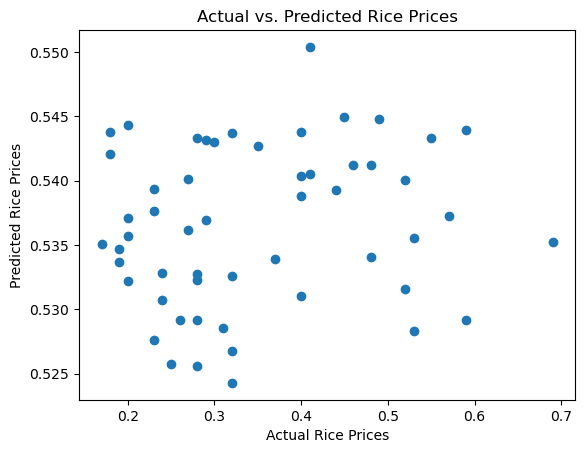

In [39]:
# Use the trained model to predict the Rice prices for the test set
predicted_rice_prices = modelr.predict(X_test)

# Plotting actual vs. predicted
plt.scatter(y_test, predicted_rice_prices)
plt.xlabel('Actual Rice Prices')
plt.ylabel('Predicted Rice Prices')
plt.title('Actual vs. Predicted Rice Prices')
plt.show()

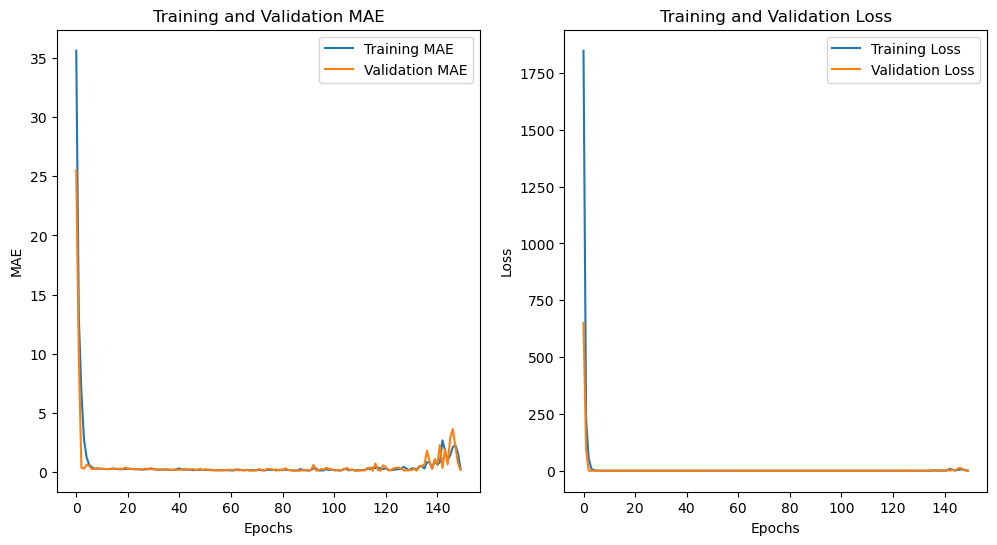

In [40]:
# Plot training and validation metrics
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### Predict Coffee Price


In [41]:
# Create the dataframe to predict the coffee price
columns = ['Year', 'Month', 'Price_coffee_kilo']
df_c= df[columns]
df_c

,Year,Month,Price_coffee_kilo
0,1992,Feb,1.51
1,1992,Mar,1.55
2,1992,Apr,1.45
3,1992,May,1.34
4,1992,Jun,1.30
...,...,...,...
353,2021,Jul,4.50
354,2021,Aug,4.77
355,2021,Sep,4.97
356,2021,Oct,5.31


In [42]:
#  Create the target
y = df_c['Price_coffee_kilo']

# Create features
X = df_c.drop('Price_coffee_kilo', axis=1)
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
X['Month'] = X['Month'].map({month: i + 1 for i, month in enumerate(month_order)})
X

,Year,Month
0,1992,2
1,1992,3
2,1992,4
3,1992,5
4,1992,6
...,...,...
353,2021,7
354,2021,8
355,2021,9
356,2021,10


In [43]:
# Create the train, validation, and test data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the model
modelc = Sequential()
modelc.add(Dense(200, input_shape=(2,), activation='relu'))
modelc.add(Dense(100, activation='relu'))
modelc.add(Dense(1, activation='linear'))

# Compile the model
modelc.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Display the model summary
modelc.summary()

# Train the model
history = modelc.fit(X_train, y_train, epochs=150, batch_size=16, validation_data=(X_val, y_val))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 200)               600       
                                                                 
 dense_14 (Dense)            (None, 100)               20100     
                                                                 
 dense_15 (Dense)            (None, 1)                 101       
                                                                 
Total params: 20801 (81.25 KB)
Trainable params: 20801 (81.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/150
16/16 [==============================] - 1s 8ms/step - loss: 653.6564 - mae: 22.2151 - val_loss: 17.3559 - val_mae: 4.0102
Epoch 2/150
16/16 [==============================] - 0s 3ms/step - loss: 83.7954 - mae: 7.9927 - val_loss: 64.1719 - val_mae: 7.9335
Epoch 3/150
16

In [44]:
# Evaluate the model
loss, mae = modelc.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test MAE: {mae}')

2/2 [==============================] - 0s 3ms/step - loss: 68.3392 - mae: 8.1637
Test Loss: 68.33917236328125, Test MAE: 8.163683891296387


In [45]:
# Pridict the coffee price for February 2022
# Create a DataFrame with the input data for January 2022
coffee_2022_df = pd.DataFrame([{'Year': 2022, 'Month': 2}])

# Use the trained model to predict the coffee price for January 2022
predicted_coffee_price_2022 = modelc.predict(coffee_2022_df)

# Print the predicted coffee price
print(f"Predicted Coffee Price for January 2022: {predicted_coffee_price_2022[0][0]}")


1/1 [==============================] - 0s 42ms/step
Predicted Coffee Price for January 2022: 11.15734577178955


2/2 [==============================] - 0s 3ms/step


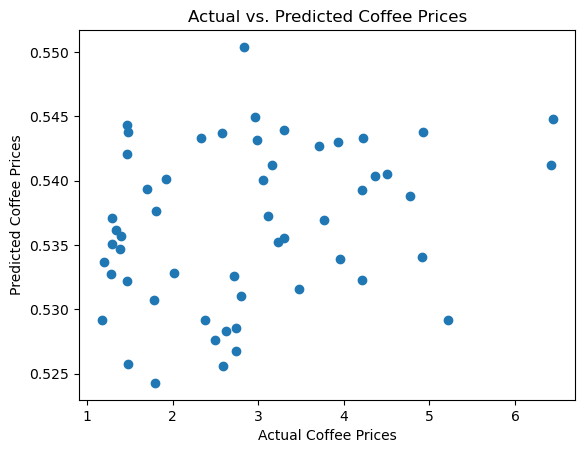

In [46]:
# Use the trained model to predict the Coffee prices for the test set
predicted_coffee_prices = modelr.predict(X_test)

# Plotting actual vs. predicted
plt.scatter(y_test, predicted_coffee_prices)
plt.xlabel('Actual Coffee Prices')
plt.ylabel('Predicted Coffee Prices')
plt.title('Actual vs. Predicted Coffee Prices')
plt.show()

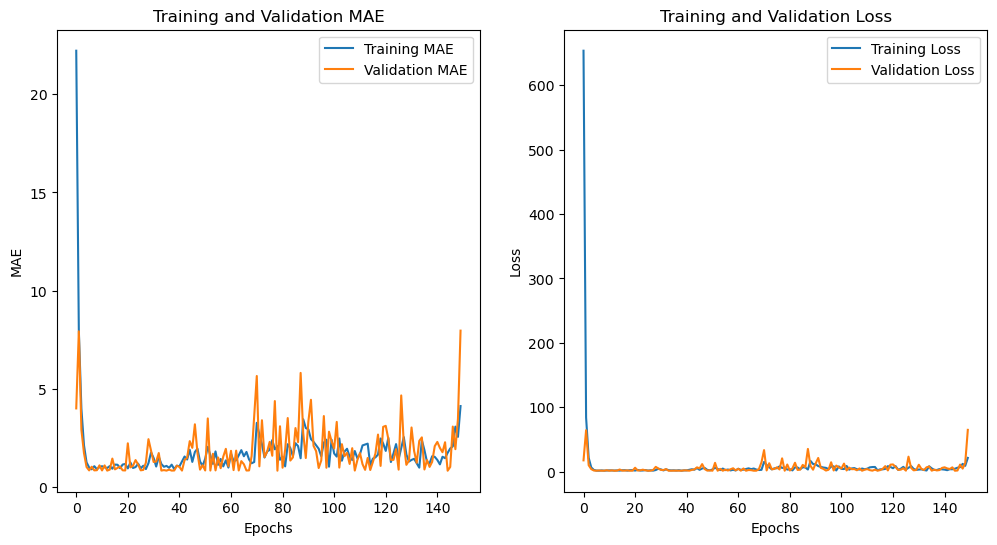

In [47]:
# Plot training and validation metrics
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Create the datafame with predicted prices of 2022

In [48]:
# Create a new DataFrame for months 2 to 12
new_df = pd.DataFrame({'Year': [2022] * 11, 'Month': list(range(2, 13))})

# Use joblib to parallelize the predictions
results = []
for index, row in new_df.iterrows():
    month = row['Month']
    input_data = new_df[new_df['Month'] == month]

    if input_data.empty:
        print(f"Input data for month {month} is empty.")
        continue

    # Create the features features for your model
    X = input_data[['Year', 'Month']]

    # Predict prices for beef, rice, and coffee
    predicted_beef = modelb.predict(X)
    predicted_rice = modelr.predict(X)
    predicted_coffee = modelc.predict(X)

    prediction = month, predicted_beef[0][0], predicted_rice[0][0], predicted_coffee[0][0]
    results.append(prediction)

# Create the DataFrame for predicted values
predictions_df = pd.DataFrame(results, columns=['Month', 'Predicted_beef', 'Predicted_rice', 'Predicted_coffee'])


# Display the DataFrame
predictions_df

1/1 [==============================] - 0s 15ms/step


,Month,Predicted_beef,Predicted_rice,Predicted_coffee
0,2,4.137054,0.549443,11.157346
1,3,4.157696,0.547787,11.153871
2,4,4.178353,0.545989,11.150443
3,5,4.198987,0.544257,11.146983
4,6,4.219675,0.542525,11.143559
5,7,4.240335,0.540838,11.140074
6,8,4.260946,0.539106,11.136642
7,9,4.281634,0.537277,11.133174
8,10,4.302312,0.535581,11.129721
9,11,4.322956,0.533816,11.126287


In [49]:
month_name = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

# Convert Months from number to name
predictions_df['Month'] = predictions_df['Month'].map(month_name)
# Reorder columns
predictions_df['Year'] = 2022
predictions_df = predictions_df[['Year', 'Month', 'Predicted_beef', 'Predicted_rice', 'Predicted_coffee']]
# Display the Dataframe
predictions_df

,Year,Month,Predicted_beef,Predicted_rice,Predicted_coffee
0,2022,Feb,4.137054,0.549443,11.157346
1,2022,Mar,4.157696,0.547787,11.153871
2,2022,Apr,4.178353,0.545989,11.150443
3,2022,May,4.198987,0.544257,11.146983
4,2022,Jun,4.219675,0.542525,11.143559
5,2022,Jul,4.240335,0.540838,11.140074
6,2022,Aug,4.260946,0.539106,11.136642
7,2022,Sep,4.281634,0.537277,11.133174
8,2022,Oct,4.302312,0.535581,11.129721
9,2022,Nov,4.322956,0.533816,11.126287


In [50]:
# Add the new predicted prices to the Dataframe
df2022=dfj
for index, row in predictions_df.iterrows():
    # Extract values from the row
    year = row['Year']
    month = row['Month']
    predicted_beef = row['Predicted_beef']
    predicted_rice = row['Predicted_rice']
    predicted_coffee = row['Predicted_coffee']

    # Add a new row to the Dataframe
    new_row = {'Year': year, 'Month': month, 'Price_beef_kilo': predicted_beef, 'Price_rice_kilo': predicted_rice, 'Price_coffee_kilo': predicted_coffee}
    df2022 = df2022.append(new_row, ignore_index=True)
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df2022['Month'] = df2022['Month'].map({month: i + 1 for i, month in enumerate(month_order)})
# Display the new DataFrame
df2022

C:\Users\romej\AppData\Local\Temp\ipykernel_22120\2266849187.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2022 = df2022.append(new_row, ignore_index=True)
C:\Users\romej\AppData\Local\Temp\ipykernel_22120\2266849187.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2022 = df2022.append(new_row, ignore_index=True)
C:\Users\romej\AppData\Local\Temp\ipykernel_22120\2266849187.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2022 = df2022.append(new_row, ignore_index=True)
C:\Users\romej\AppData\Local\Temp\ipykernel_22120\2266849187.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2022 = df2022.append(new_row, ign

,Year,Month,Price_beef_kilo,Price_rice_kilo,Price_coffee_kilo,Inflation_rate,Price_rice_infl,Price_beef_infl,Price_coffee_infl
0,1992,2,2.520000,0.280000,1.510000,89.59,0.53,4.78,2.86
1,1992,3,2.450000,0.280000,1.550000,89.59,0.53,4.64,2.94
2,1992,4,2.380000,0.280000,1.450000,89.59,0.53,4.51,2.75
3,1992,5,2.380000,0.270000,1.340000,89.59,0.51,4.51,2.54
4,1992,6,2.330000,0.270000,1.300000,89.59,0.51,4.42,2.46
...,...,...,...,...,...,...,...,...,...
365,2022,8,4.260946,0.539106,11.136642,NaN,NaN,NaN,NaN
366,2022,9,4.281634,0.537277,11.133174,NaN,NaN,NaN,NaN
367,2022,10,4.302312,0.535581,11.129721,NaN,NaN,NaN,NaN
368,2022,11,4.322956,0.533816,11.126287,NaN,NaN,NaN,NaN


### Predict the inflation rate for the rest of 2022

In [51]:
# Reuse the model to refresh variables
columns = ['Year', 'Month', 'Price_beef_kilo', 'Price_rice_kilo', 'Price_coffee_kilo', 'Inflation_rate']
df_inflation = df[columns].copy()

# Encode month names to numbers
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_inflation['Month'] = df_inflation['Month'].map({month: i + 1 for i, month in enumerate(month_order)})

# Create the target
y = df_inflation['Inflation_rate']

# Create features
X = df_inflation.drop('Inflation_rate', axis=1)
# Use Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Use Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Split the data into training and temp
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Split the temp set into validation and test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the model
model = Sequential()
model.add(Dense(100, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(50, activation='relu'))

model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=16, validation_data=(X_val, y_val))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               2100      
                                                                 
 dense_17 (Dense)            (None, 50)                5050      
                                                                 
 dense_18 (Dense)            (None, 1)                 51        
                                                                 
Total params: 7201 (28.13 KB)
Trainable params: 7201 (28.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/150
16/16 [==============================] - 1s 8ms/step - loss: 1894.0209 - mae: 35.0616 - val_loss: 1815.9604 - val_mae: 33.4709
Epoch 2/150
16/16 [==============================] - 0s 3ms/step - loss: 1728.9382 - mae: 33.1057 - val_loss: 1621.0011 - val_mae: 31.1504
Epoch 

In [52]:
# Extract the input features for the prediction months (Feb to Dec 2022)
X_predict = df2022.loc[:, ['Year', 'Month', 'Price_beef_kilo', 'Price_rice_kilo', 'Price_coffee_kilo']]

# Use Polynomial Features
X_predict_poly = poly.transform(X_predict)

# Scale the input features
X_predict_scaled = scaler.transform(X_predict_poly)

# Predict inflation rates using the trained model
y_predict = model.predict(X_predict_scaled)

# Fill NaN values in the original DataFrame
df2022['Inflation_rate'] = y_predict

# Display the DataFrame with predicted inflation rates
df2022.tail(15)

12/12 [==============================] - 0s 1ms/step


,Year,Month,Price_beef_kilo,Price_rice_kilo,Price_coffee_kilo,Inflation_rate,Price_rice_infl,Price_beef_infl,Price_coffee_infl
355,2021,9,5.660000,0.400000,4.970000,-0.915094,0.39,5.59,4.91
356,2021,10,5.700000,0.400000,5.310000,-1.183391,0.39,5.63,5.24
357,2021,11,5.950000,0.400000,5.710000,-1.622845,0.39,5.87,5.64
358,2022,1,5.970000,0.430000,5.980000,-3.562822,-0.77,-10.69,-10.71
359,2022,2,4.137054,0.549443,11.157346,24.339569,NaN,NaN,NaN
360,2022,3,4.157696,0.547787,11.153871,24.581858,NaN,NaN,NaN
361,2022,4,4.178353,0.545989,11.150443,24.652479,NaN,NaN,NaN
362,2022,5,4.198987,0.544257,11.146983,24.727879,NaN,NaN,NaN
363,2022,6,4.219675,0.542525,11.143559,25.024923,NaN,NaN,NaN
364,2022,7,4.240335,0.540838,11.140074,25.191475,NaN,NaN,NaN


### Calculate the pricces inflation

In [53]:
# Initialize the prices for the first row
initial_prices = df2022.loc[356, ['Price_rice_kilo', 'Price_beef_kilo', 'Price_coffee_kilo']].values

# Columns to update
inflated_price_columns = ['Price_rice_infl', 'Price_beef_infl', 'Price_coffee_infl']

# Loop through the DataFrame starting from the second row (index 357)
for i in range(357, len(df2022)):
    # Get the inflation rates for the current row
    inflation_rates = df2022.loc[i, 'Inflation_rate']

    # Check if inflation_rates is not NaN
    if not np.isnan(inflation_rates):
        # Calculate inflated prices using the previous month's prices and inflation rates
        inflated_prices = initial_prices * (1 + inflation_rates / 100)

        # Update the inflated prices in the DataFrame
        df2022.loc[i, inflated_price_columns] = inflated_prices

        # Set the inflated prices as the initial prices for the next iteration
        initial_prices = inflated_prices

# Display the updated DataFrame
df2022.tail(13)

,Year,Month,Price_beef_kilo,Price_rice_kilo,Price_coffee_kilo,Inflation_rate,Price_rice_infl,Price_beef_infl,Price_coffee_infl
357,2021,11,5.950000,0.400000,5.710000,-1.622845,0.393509,5.607498,5.223827
358,2022,1,5.970000,0.430000,5.980000,-3.562822,0.379489,5.407713,5.037711
359,2022,2,4.137054,0.549443,11.157346,24.339569,0.471855,6.723927,6.263869
360,2022,3,4.157696,0.547787,11.153871,24.581858,0.587845,8.376793,7.803644
361,2022,4,4.178353,0.545989,11.150443,24.652479,0.732763,10.441880,9.727435
362,2022,5,4.198987,0.544257,11.146983,24.727879,0.913960,13.023935,12.132824
363,2022,6,4.219675,0.542525,11.143559,25.024923,1.142678,16.283165,15.169054
364,2022,7,4.240335,0.540838,11.140074,25.191475,1.430536,20.385134,18.990362
365,2022,8,4.260946,0.539106,11.136642,25.554432,1.796101,25.594440,23.843241
366,2022,9,4.281634,0.537277,11.133174,25.928843,2.261809,32.230782,30.025518
